# Line plots

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

/var/folders/fw/40ykb3nj66dcx6d6rr1n66pr0000gr/T/ipykernel_91778/2929487443.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [3]:
load_dotenv(find_dotenv(usecwd=True));
data_folder=os.getenv('DATA_FOLDER')

In [4]:
figsize_rect = (9, 5)
figsize_square = (8, 8)

fs_xl = 36 # titles
fs_l = 24 # subtitles
fs_m = 16 # axes and tick labels
fs_s = 14 # small stuff

In [5]:
def stamp(ax, color, alpha, label, clip_on=False, linewidth=5, fontsize=fs_m):
    ax.text(1.0, 1.0, label + "  ", color=color, alpha=alpha, fontsize=fontsize, weight='bold',
            va='top', ha='right', transform=ax.figure.transFigure, clip_on=clip_on)
    ax.add_patch(mpl.patches.ConnectionPatch(xyA=(1, 0), xyB=(1, 1), coordsA="figure fraction", 
                                         coordsB="figure fraction", axesA=ax, axesB=ax, 
                                         color=color, alpha=alpha, linewidth=linewidth,
                                         capstyle='butt', transform=ax.figure.transFigure))

def stamp_good(ax):
    stamp(ax, "olivedrab", 0.7, "good")

def stamp_phantom(ax):
    stamp(ax, "transparent", 0, "")

def stamp_bad(ax):
    stamp(ax, "#d02138", 1, "bad")

def stamp_wrong(ax):
    stamp(ax, "#8E202C", 1, "wrong")

def stamp_ugly(ax):
    stamp(ax, "#DC9515", 1, "ugly")

In [8]:
df = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'preprints', 'preprint_data.txt'), sep='\t')

# Remove the last column
df = df.iloc[:, :-1]

# Rename the first column
df.rename(columns={df.columns[0]: 'archive'}, inplace=True)

# Reshape the DataFrame from wide to long format and convert the date column to datetime
df = df.melt(id_vars='archive', var_name='date', value_name='count')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m') - pd.tseries.offsets.MonthBegin(1)


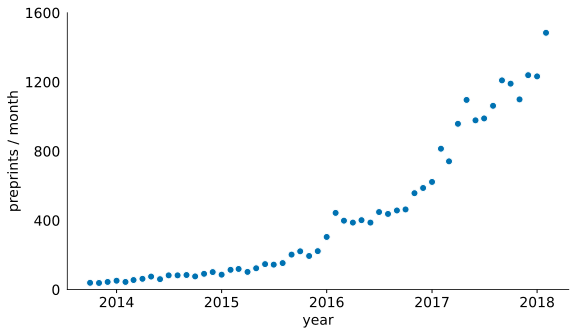

In [21]:
# Filter the DataFrame
biorxiv_growth = df[(df['archive'] == 'bioRxiv') & (df['count'] > 0)]

# Create the plot
fig, ax = plt.subplots(figsize=figsize_rect)

# Add points
ax.scatter(biorxiv_growth['date'], biorxiv_growth['count'], color='#0072B2',
           edgecolors='white', s=50)


# Set the y-axis limits and label
ax.set_ylim(0, 1600)
ax.set_yticks(range(0, 1601, 400))
ax.set_ylabel('preprints / month', fontsize=fs_s)

# Set the x-axis label
ax.set_xlabel('year', fontsize=fs_s)

# Format the x-axis to show years
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=fs_s, color='black',
               width=1.)

# Set the plot margins
# fig.subplots_adjust(left=0.07, right=0.93, top=0.97, bottom=0.15)

plt.show()

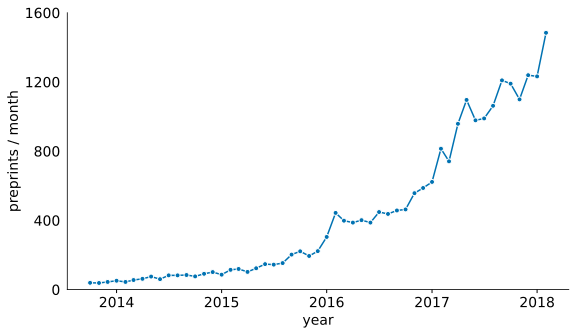

In [22]:
fig, ax = plt.subplots(figsize=figsize_rect)

# Create the line plot with markers
ax.plot(biorxiv_growth['date'], biorxiv_growth['count'], marker='o', color='#0072B2',
        linestyle='-', markersize=5, markeredgecolor='white')

# Set the y-axis limits and label
ax.set_ylim(0, 1600)
ax.set_yticks(range(0, 1601, 400))
ax.set_ylabel('preprints / month', fontsize=fs_s)

# Set the x-axis label
ax.set_xlabel('year', fontsize=fs_s)

# Format the x-axis to show years
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=fs_s, color='black',
               width=1.)

plt.show()

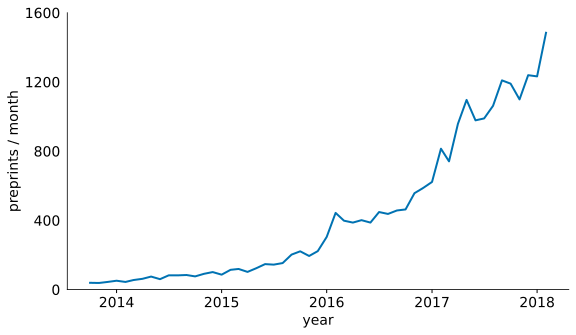

In [26]:
fig, ax = plt.subplots(figsize=figsize_rect)

# Create the line plot with markers
ax.plot(biorxiv_growth['date'], biorxiv_growth['count'], marker=None, color='#0072B2',
        linestyle='-', linewidth=2)

# Set the y-axis limits and label
ax.set_ylim(0, 1600)
ax.set_yticks(range(0, 1601, 400))
ax.set_ylabel('preprints / month', fontsize=fs_s)

# Set the x-axis label
ax.set_xlabel('year', fontsize=fs_s)

# Format the x-axis to show years
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=fs_s, color='black',
               width=1.)

plt.show()

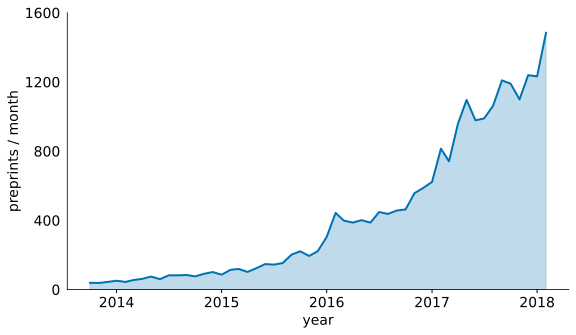

In [33]:
fig, ax = plt.subplots(figsize=figsize_rect)

# Create the line plot with markers
ax.plot(biorxiv_growth['date'], biorxiv_growth['count'], marker=None, color='#0072B2',
        linestyle='-', linewidth=2)

# Fill the area below the line
ax.fill_between(biorxiv_growth['date'], biorxiv_growth['count'], color='#0072B2', alpha=0.25)

# Set the y-axis limits and label
ax.set_ylim(0, 1600)
ax.set_yticks(range(0, 1601, 400))
ax.set_ylabel('preprints / month', fontsize=fs_s)

# Set the x-axis label
ax.set_xlabel('year', fontsize=fs_s)

# Format the x-axis to show years
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=fs_s, color='black',
               width=1.)

plt.show()

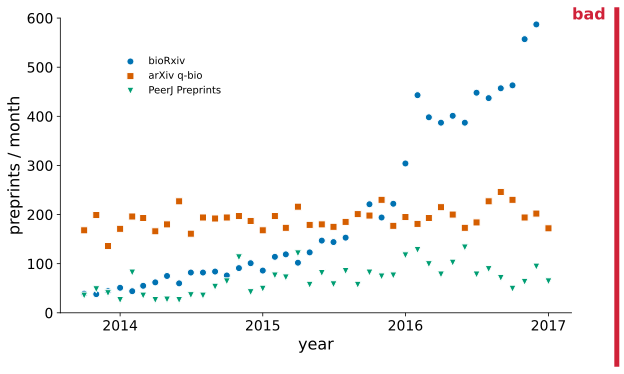

In [49]:
# Filter the DataFrame and convert the 'archive' column to a categorical type
preprints = df[df['archive'].isin(['bioRxiv', 'arXiv q-bio', 'PeerJ Preprints']) & (df['count'] > 0)]
preprints = preprints.loc[(preprints['date'] > '2013-09-01') & (preprints['date'] < '2017-02-01')]
cat_type = pd.api.types.CategoricalDtype(categories=['bioRxiv', 'arXiv q-bio', 'PeerJ Preprints'], ordered=True)
preprints['archive'] = preprints['archive'].astype(cat_type)

# Create the plot
fig, ax = plt.subplots(figsize=figsize_rect)

# Create a dictionary to map archives to colors and shapes
color_dict = {'bioRxiv': '#0072b2', 'arXiv q-bio': '#D55E00', 'PeerJ Preprints': '#009e73'}
marker_dict = {'bioRxiv': 'o', 'arXiv q-bio': 's', 'PeerJ Preprints': 'v'}

# Add points to the plot for each archive
for archive in preprints['archive'].cat.categories:
    archive_data = preprints[preprints['archive'] == archive]
    ax.scatter(archive_data['date'], archive_data['count'], color=color_dict[archive], edgecolors='white', s=50, marker=marker_dict[archive])

# Set the y-axis limits and label
ax.set_ylim(0, 600)
ax.set_ylabel('preprints / month', fontsize=fs_m)

# Set the x-axis label and limits
ax.set_xlabel('year', fontsize=fs_m)
ax.set_xlim(pd.to_datetime('2013-08-01'), pd.to_datetime('2017-03-01'))

# Format the x-axis to show years
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the plot margins
fig.subplots_adjust(left=0.14, right=0.93, top=0.97, bottom=0.15)

# Add a legend
ax.legend(preprints['archive'].cat.categories, loc='upper left', bbox_to_anchor=(0.1, 0.9),
          frameon=False)

stamp_bad(ax)
plt.show()

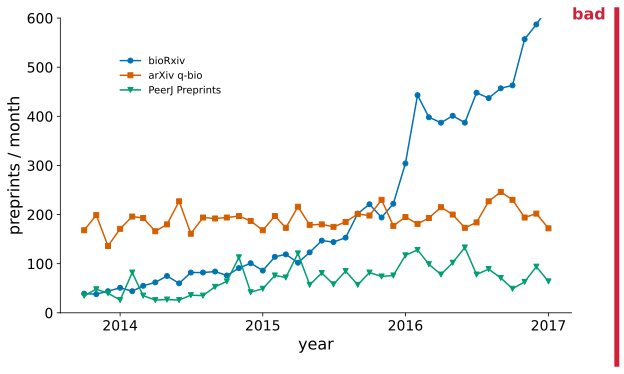

In [50]:
fig, ax = plt.subplots(figsize=figsize_rect)

# Create a dictionary to map archives to colors and shapes
color_dict = {'bioRxiv': '#0072b2', 'arXiv q-bio': '#D55E00', 'PeerJ Preprints': '#009e73'}
marker_dict = {'bioRxiv': 'o', 'arXiv q-bio': 's', 'PeerJ Preprints': 'v'}

# Add points to the plot for each archive
for archive in preprints['archive'].cat.categories:
    archive_data = preprints[preprints['archive'] == archive]
    ax.plot(archive_data['date'], archive_data['count'], color=color_dict[archive],
            markersize=5, linestyle='-', marker=marker_dict[archive])

# Set the y-axis limits and label
ax.set_ylim(0, 600)
ax.set_ylabel('preprints / month', fontsize=fs_m)

# Set the x-axis label and limits
ax.set_xlabel('year', fontsize=fs_m)
ax.set_xlim(pd.to_datetime('2013-08-01'), pd.to_datetime('2017-03-01'))

# Format the x-axis to show years
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the plot margins
fig.subplots_adjust(left=0.14, right=0.93, top=0.97, bottom=0.15)

# Add a legend
ax.legend(preprints['archive'].cat.categories, loc='upper left', bbox_to_anchor=(0.1, 0.9),
          frameon=False)

plt.show()

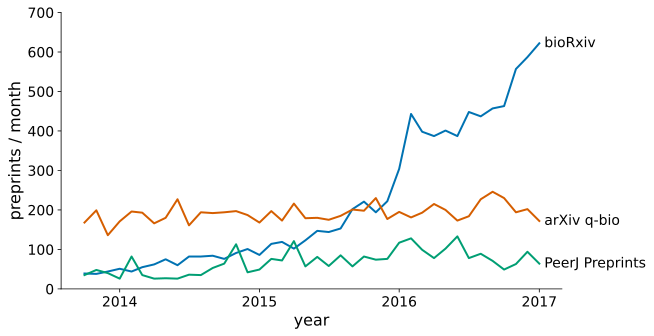

In [75]:
fig, ax = plt.subplots(figsize=figsize_rect)

# Create a dictionary to map archives to colors and shapes
color_dict = {'bioRxiv': '#0072b2', 'arXiv q-bio': '#D55E00', 'PeerJ Preprints': '#009e73'}
marker_dict = {'bioRxiv': 'o', 'arXiv q-bio': 's', 'PeerJ Preprints': 'v'}

# Add points to the plot for each archive
for archive in preprints['archive'].cat.categories:
    archive_data = preprints[preprints['archive'] == archive]
    ax.plot(archive_data['date'], archive_data['count'], color=color_dict[archive],
            linestyle='-', linewidth=2)
    # Add a label to the end of the line
    end_point = archive_data.iloc[-1]
    ax.annotate(archive, (end_point['date'], end_point['count']),
                textcoords="offset points", xytext=(5,0), ha='left', va='center',
                fontsize=fs_s)

# Set the y-axis limits and label
ax.set_ylim(0, 700)
ax.set_ylabel('preprints / month', fontsize=fs_m)

# Set the x-axis label and limits
ax.set_xlabel('year', fontsize=fs_m)
ax.set_xlim(pd.to_datetime('2013-08-01'), pd.to_datetime('2017-03-01'))

# Format the x-axis to show years
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [62]:
oats_df = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'MASS', 'oats.csv'))

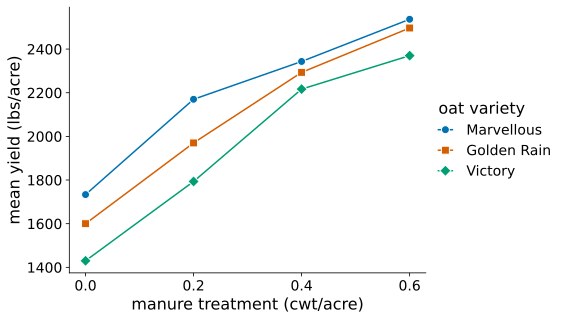

In [81]:
# Convert the 'variety' column to a categorical type with specified levels
cat_type = pd.api.types.CategoricalDtype(categories=['Marvellous', 'Golden Rain', 'Victory'], ordered=True)
oats_df['variety'] = oats_df['variety'].astype(cat_type)

# Create the plot
fig, ax = plt.subplots()

# Create a dictionary to map varieties to colors and shapes
color_dict = {'Marvellous': '#0072b2', 'Golden Rain': '#D55E00', 'Victory': '#009e73'}
marker_dict = {'Marvellous': 'o', 'Golden Rain': 's', 'Victory': 'D'}

# Add lines and points to the plot for each variety
for variety in oats_df['variety'].cat.categories:
    variety_data = oats_df[oats_df['variety'] == variety]
    ax.plot(variety_data['N'], variety_data['mean'], color=color_dict[variety],
            marker=marker_dict[variety], markersize=8, linestyle='-', linewidth=1.5, markeredgecolor='white',
            label=variety)

# Set the y-axis label
ax.set_ylabel('mean yield (lbs/acre)', fontsize=fs_m)

# Set the x-axis label
ax.set_xlabel('manure treatment (cwt/acre)', fontsize=fs_m)

ax.set_xticks([0.0, 0.2, 0.4, 0.6])
ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
leg = ax.legend(ncols=1, loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False,
          handlelength=1, handletextpad=1, fontsize=fs_s,
          title='oat variety')

leg._legend_box.align = "left"

leg.get_title().set_fontsize(fs_m)  # Set font size

plt.show()